# Student Performance Project
Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

[Original Source](http://www3.dsi.uminho.pt/pcortez)

## Section 0: Introduction

This is a classification and regression project looking into student performance in Portuguese and Maths classes using data from the UCI Machine Learning Repository. There are two datasets; one for each subject, and there is a crossover of 382 students between the two who can be identified by finding identical attricbutes.

### Dataset Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Attribute Information

#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

#### These grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

Let's begin.

***

## Section 1: Setup
* Importing appropriate libraries
* Importing the data

In [1]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data import
portu = pd.read_csv('student-por.csv', sep = ';')
maths = pd.read_csv('student-mat.csv', sep = ';')

***

## Section 2: Data Cleaning and Management
* Look into the data
    * Understand size of datasets
    * Identify missing values
    * Identify data issues
* Manage missing values
* Drop unnecessary columns
* Identifying the students who are in both datasets

In [3]:
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
portu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
portu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

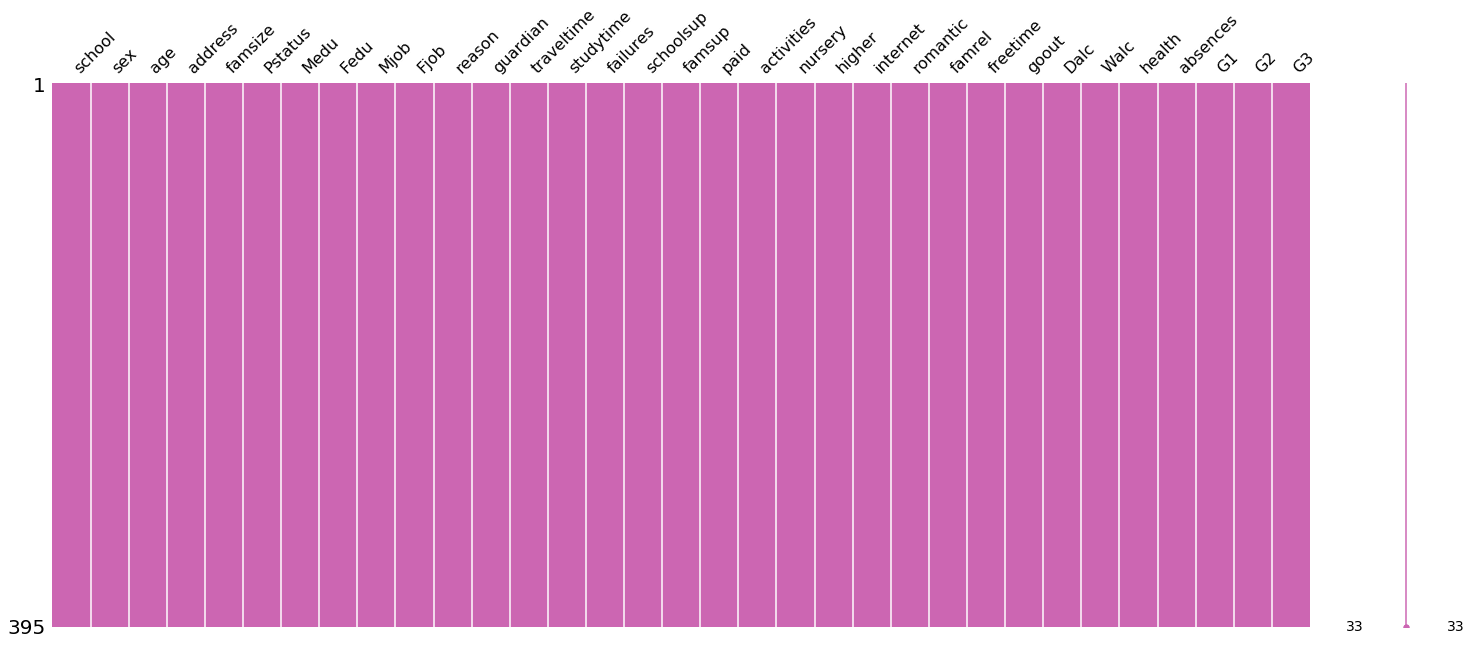

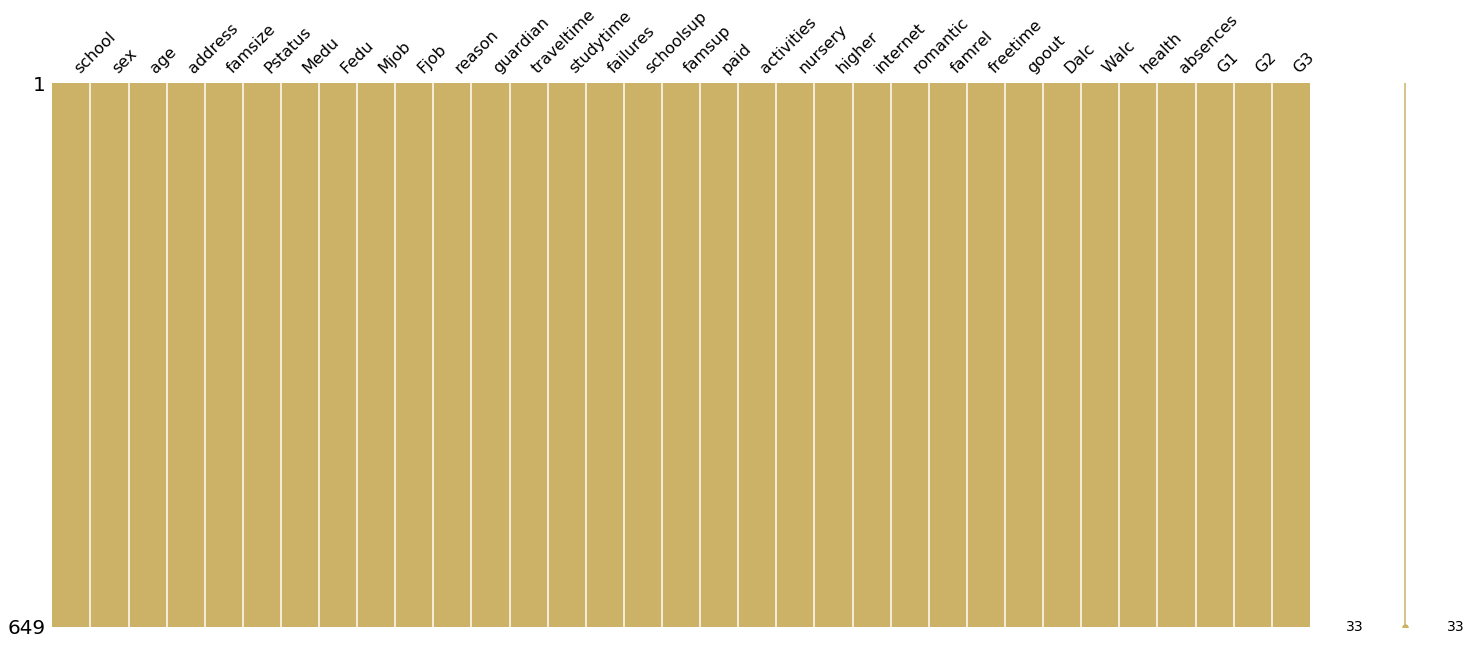

In [7]:
import missingno as msno
msno.matrix(maths, color = (0.8, 0.4, 0.7))
msno.matrix(portu, color = (0.8, 0.7, 0.4))

There are no null values within either dataset. There are, however, many categorical variables which will need to me dealt with in order to build an effective model.

In [8]:
maths.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
portu.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Based on the initial view I have of the data, it seems that there is very little out of the ordinary. There is a case in the maths dataset with 75 absenses, which is a lot higher than the mean; this will be something I will look into in the EDA section of the project.

In this project, I will take the 382 students who are in both datasets, investigating how performance in one class may affect the other.

In [10]:
intersect_col = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
df = pd.merge(maths, portu, 
                on=intersect_col,
                suffixes=['_maths','_portu'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_portu,freetime_portu,goout_portu,Dalc_portu,Walc_portu,health_portu,absences_portu,G1_portu,G2_portu,G3_portu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Since G1 and G2 are good indicators of G3, the final grade, more value would be found in being able to predict grades without any knowledge of prior assessment. As a result, I will drop the G1 and G2 columns.

In [11]:
df.drop(['G1_maths', 'G2_maths', 'G1_portu', 'G2_portu'], axis = 1, inplace = True)

***

## Section 3: Exploratory Data Analysis

The data is now close to being ready for the model build. Before doing so, however, I will do some EDA to gain an insight into the students.

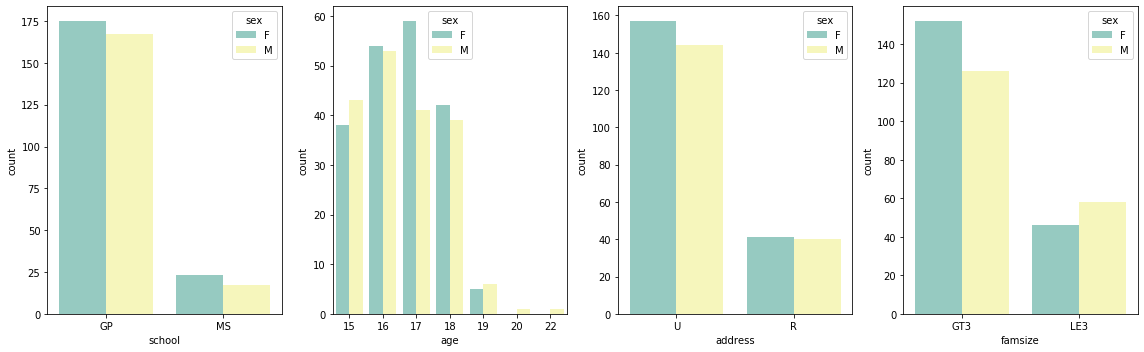

In [12]:
# count plots to see the basic info
fig, ax =plt.subplots(1,4,figsize=(16,5))
sns.countplot(x='school', data = df, ax=ax[0], hue='sex', palette = 'Set3')
sns.countplot(x='age', data = df, ax=ax[1], hue='sex', palette = 'Set3')
sns.countplot(x='address', data = df, ax=ax[2], hue='sex', palette = 'Set3')
sns.countplot(x='famsize', data = df, ax=ax[3], hue='sex', palette = 'Set3')
fig.tight_layout()

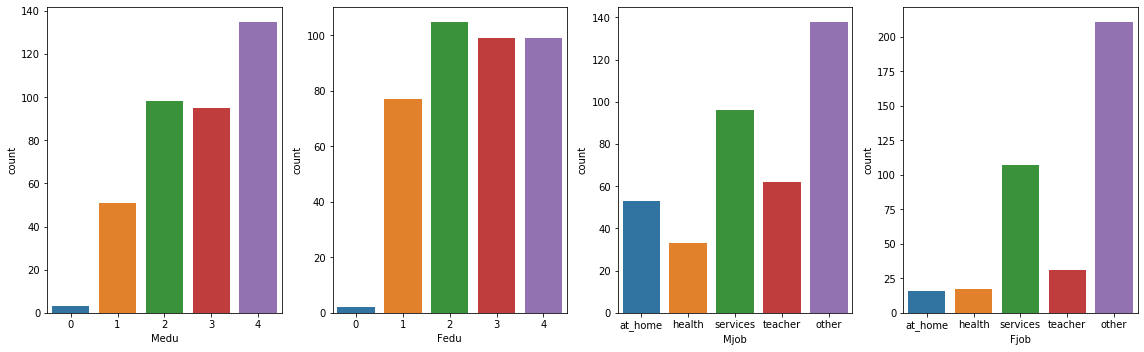

In [20]:
# look into the students' parents
fig, ax = plt.subplots(1,4,figsize=(16,5))
sns.countplot(x='Medu', data = df, ax=ax[0])
sns.countplot(x='Fedu', data = df, ax=ax[1])
sns.countplot(x='Mjob', order = ['at_home', 'health', 'services', 'teacher', 'other'], data = df, ax=ax[2])
sns.countplot(x='Fjob', order = ['at_home', 'health', 'services', 'teacher', 'other'], data = df, ax=ax[3])
fig.tight_layout()

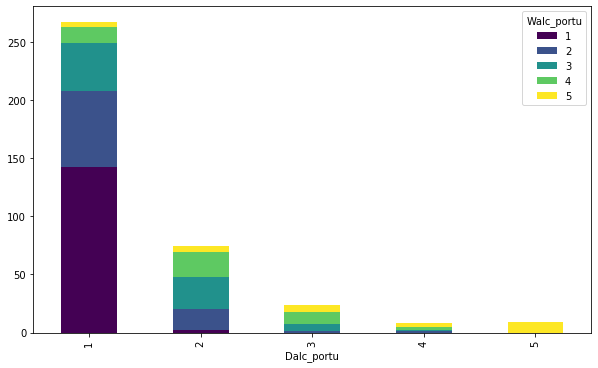

In [34]:
# take a look at the students' alcohol consumption on the weekdays and weekends
# portuguese
df_plot = df.groupby(['Walc_portu', 'Dalc_portu']).size().reset_index().pivot(columns='Walc_portu', index='Dalc_portu', values=0)

df_plot.plot(kind='bar', stacked=True, figsize=(10,6), cmap='viridis')

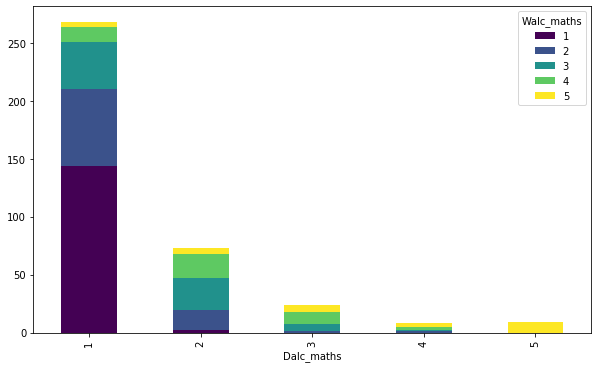

In [35]:
# take a look at the students' alcohol consumption on the weekdays and weekends
# maths
df_plot = df.groupby(['Walc_maths', 'Dalc_maths']).size().reset_index().pivot(columns='Walc_maths', index='Dalc_maths', values=0)

df_plot.plot(kind='bar', stacked=True, figsize=(10,6), cmap='viridis')

***

## Section 4: Model Build

* Categorical features
* Train test split
* Training model

### Categorical Features
There are many categorical variables in the datasets which I will need to convert into dummy variables in order to create an effective model

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school            382 non-null    object
 1   sex               382 non-null    object
 2   age               382 non-null    int64 
 3   address           382 non-null    object
 4   famsize           382 non-null    object
 5   Pstatus           382 non-null    object
 6   Medu              382 non-null    int64 
 7   Fedu              382 non-null    int64 
 8   Mjob              382 non-null    object
 9   Fjob              382 non-null    object
 10  reason            382 non-null    object
 11  guardian_maths    382 non-null    object
 12  traveltime_maths  382 non-null    int64 
 13  studytime_maths   382 non-null    int64 
 14  failures_maths    382 non-null    int64 
 15  schoolsup_maths   382 non-null    object
 16  famsup_maths      382 non-null    object
 17  paid_maths      

In [43]:
# categorical features in the datasets
cat_feats = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian_maths', 'guardian_portu',
             'schoolsup_maths', 'schoolsup_portu', 'famsup_maths', 'famsup_portu', 'paid_maths',
             'paid_portu', 'activities_maths', 'activities_portu', 'nursery', 'higher_maths', 'higher_portu',
             'internet', 'romantic_maths', 'romantic_portu']

In [44]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [45]:
final_data.head()

,age,Medu,Fedu,traveltime_maths,studytime_maths,failures_maths,famrel_maths,freetime_maths,goout_maths,Dalc_maths,...,paid_maths_yes,paid_portu_yes,activities_maths_yes,activities_portu_yes,nursery_yes,higher_maths_yes,higher_portu_yes,internet_yes,romantic_maths_yes,romantic_portu_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,0,1,1,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,0,0,1,1,1,0,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,0,1,1,1,1,0,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,1,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,0,1,1,1,0,0,0


### Train Test Split
The model will aim to predict performance in the maths class

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = final_data.drop('G3_maths', axis = 1)
y = final_data['G3_maths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training the Model and Making Predictions
I will start by using a linear regression model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# create instance
lm = LinearRegression()
# fit the model to the training data
lm.fit(X_train, y_train)
# predicting the test data
lm_preds = lm.predict(X_test)

Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# create instance
rfc = RandomForestClassifier()
# fit the model to the training data
rfc.fit(X_train, y_train)
# predicting the test data
rfc_preds = rfc.predict(X_test)

Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# create instance
dtree = DecisionTreeClassifier()
# fit the model to the training data
dtree.fit(X_train, y_train)
# predicting the test data
dtree_preds = dtree.predict(X_test)

***

## Section 5: Model Evaluation

Start with some scatter plots for a quic view of how accurate the models were

Text(0.5, 1.0, 'Linear Model')

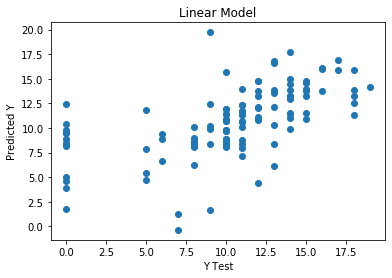

In [66]:
plt.scatter(y_test,lm_preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Linear Model')

Text(0.5, 1.0, 'Random Forest')

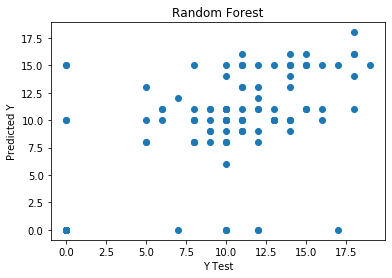

In [65]:
plt.scatter(y_test,rfc_preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Random Forest')

Text(0.5, 1.0, 'Decision Tree')

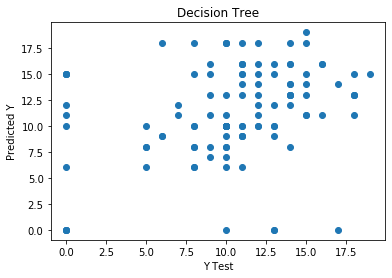

In [64]:
plt.scatter(y_test,dtree_preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Decision Tree')

The plots show that the models aren't overly accurate at predicting the test score

In [80]:
from sklearn import metrics

In [81]:
print('Linear model MAE:', metrics.mean_absolute_error(y_test, lm_preds))
print('Linear model MSE:', metrics.mean_squared_error(y_test, lm_preds))
print('Linear model RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_preds)))

Linear model MAE: 2.683830191751599
Linear model MSE: 14.904399251249837
Linear model RMSE: 3.8606216146172416


In [82]:
print('Random forest MAE:', metrics.mean_absolute_error(y_test, rfc_preds))
print('Random forest MSE:', metrics.mean_squared_error(y_test, rfc_preds))
print('Random forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_preds)))

Random forest MAE: 3.0608695652173914
Random forest MSE: 21.095652173913045
Random forest RMSE: 4.593000345516321


In [83]:
print('Decision tree MAE:', metrics.mean_absolute_error(y_test, dtree_preds))
print('Decision tree MSE:', metrics.mean_squared_error(y_test, dtree_preds))
print('Decision tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_preds)))

Decision tree MAE: 3.8086956521739133
Decision tree MSE: 29.82608695652174
Decision tree RMSE: 5.461326483238458


It can be seen that the linear model was the most accurate of the three. However, in a 20-mark test, it still tended to be out by c.20%. Obviously, this isn't a great model for predicting test scores.
Despite the fact that the dataset contained extensive attributes about the students and their parents, it seems that there are other factors that must 